## Так себе физик

Где-то получил эти данные (50 раз засекал по 8 секунд на лабораторных работах по физике) отправил данные в формате CSV, теперь хочет проверить, на сколько данные нормальны.
Оказалось, что данные отсортированы.

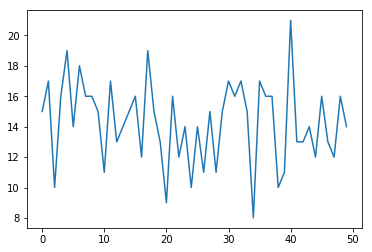

In [41]:
%matplotlib inline  

import pandas as pd
import random

import matplotlib
import numpy
import matplotlib.pyplot as plt

dfn = pd.read_csv("experiments.csv")
dfm = pd.read_csv("mydata.csv")

dfn['experiments'].plot()

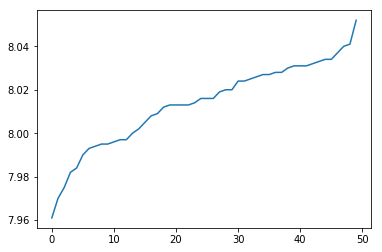

In [42]:
dfm['data'].plot()

Посмотрим на *плотность распределения*...
Будем смотреть на отдельных графиках, поскольку разные масштабы данных, а нам лишь нужно оценить вид кривой.

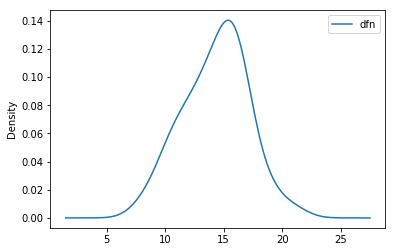

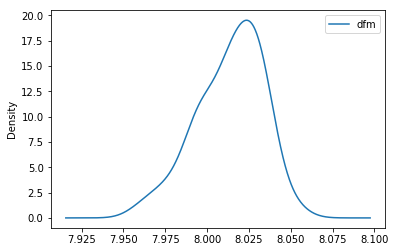

In [45]:
pldfn = pd.DataFrame(data={
    'dfn': dfn['experiments'],

})
pldfn.plot.kde()

pldfm = pd.DataFrame(data={
    'dfm': dfm['data'],

})
pldfm.plot.kde()

`dfm` с виду похож на *нормальное распределение*

А мы можем это оценить численно, или нет? Можем. При помощи критерия Колмогорова-Смирнова.

Гипотеза: данное распределение близко к нормальному.

В результате проверки вычисляются два числа — *К-С-статистика* и *P-значение*. Если первое мало или второе велико, мы гипотезу отвергнуть не можем. В противном случае, гипотеза может считаться ошибочной.

In [46]:
from scipy import stats

d1 = dfn['experiments']
d2 = dfm['data']

# If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.
print(stats.kstest(d1, 'norm', (d1.mean(), d1.std())))
print(stats.kstest(d2, 'norm', (d2.mean(), d2.std())))

KstestResult(statistic=0.12073762128625531, pvalue=0.43019823961789583)
KstestResult(statistic=0.11068054425106055, pvalue=0.54681647375858011)


Видим, что для первого распределения *К-С-статистика* больше, чем для второго, но не намного. *P-значение* для первого незаметно ниже. Т.е. второе примерно такое же нормальное, как и первое.